## WQI Prediction 

### Packages used

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from scipy.spatial.distance import pdist, squareform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

import pickle

## Loading Data

Routine freshwater monitoring data collected by the The WA State Department of Ecology's River and Stream Monitoring Program are summarized by a technique called the "Water Quality Index" (WQI). The WQI ranges from 1 (poor quality) to 100 (good quality). The WQI summary does not include non-standard elements like metals. For temperature, pH, oxygen, and fecal coliform bacteria, the WQI is based on criteria in Washington’s Water Quality Standards, WAC 173-201A. For nutrient and sediment measures where standards are not specific, results are based on expected conditions in a given region. Multiple constituents are combined and results aggregated over time to produce a single score for each station and each year. All current long-term Ecology monitoring stations with at least 5 years data are included. Most stations are located near the mouths of major streams. These stations integrate upstream water quality and capture large basin-scale trends. However, status and trends at these locations may not reflect status or trends in any particular sub-basin. Scores for individual parameters are presented as **Oxygen (Oxy) , pH, temperature (TEMP), total suspended sediment (TSS), turbidity(Turb), nitrogen(TPN), and phosphorus(TP).**

In [3]:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# --- Load libraries -----------------------------------------------------------
data = pd.read_csv ('WQI_Parameter_Scores_1994-2013.csv')
# data=turicreate.SFrame('WQI_Parameter_Scores_1994-2013.csv')
data.head(3)

,Station,Station Name,Year,Overall WQI,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb,Location 1
0,16A070,Skokomish R nr Potlatch,1996.0,87,91,85,95,78,81,99,84,69,POINT (-123.1771 47.3098)
1,16A070,Skokomish R nr Potlatch,1997.0,86,78,84,77,85,90,99,72,80,POINT (-123.1771 47.3098)
2,16A070,Skokomish R nr Potlatch,1998.0,75,90,79,88,61,90,98,71,49,POINT (-123.1771 47.3098)


In [4]:
data.columns

Index(['Station', 'Station Name', 'Year', 'Overall WQI', 'WQI FC', 'WQI Oxy',
       'WQI pH', 'WQI TSS', 'WQI Temp', 'WQI TPN', 'WQI TP', 'WQI Turb',
       'Location 1'],
      dtype='object')

In [5]:
data.describe()

,Year,Overall WQI,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,1838.377113,73.985582,86.833162,85.698249,86.085479,66.909372,76.128733,80.933059,73.656025,68.302781
std,570.487013,13.760012,10.450816,6.701022,9.806052,19.998196,11.955368,22.239897,21.426718,20.767664
min,-119.024200,19.000000,0.000000,51.000000,43.000000,0.000000,17.000000,0.000000,0.000000,1.000000
25%,1998.000000,66.000000,82.000000,81.000000,80.000000,55.000000,69.000000,77.000000,61.000000,57.500000
50%,2004.000000,76.000000,88.000000,86.000000,89.000000,71.000000,78.000000,89.000000,78.000000,72.000000
75%,2009.000000,84.000000,94.000000,91.000000,94.000000,82.000000,85.000000,97.000000,91.000000,84.000000
max,2014.000000,98.000000,100.000000,100.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Function to divide data into class

In [6]:
# clasificación de las aguas en categorias dependiendo del indice
data["quality"] = ""
for i in range(0,len(data)):
    if (data["Overall WQI"][i] <= 100) and (data["Overall WQI"][i] > 95):
        data["quality"][i] = "Excellent"
    elif (data["Overall WQI"][i] <= 94) and (data["Overall WQI"][i] > 80):
        data["quality"][i] = "Good"
    elif (data["Overall WQI"][i] <= 79) and (data["Overall WQI"][i] > 65):
        data["quality"][i] = "Fair"   
    elif (data["Overall WQI"][i] <= 64) and (data["Overall WQI"][i] > 45):
        data["quality"][i] = "Marginal"
    else :
        data["quality"][i] = "Poor"
 

D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.pa

In [7]:
# clasificación de las aguas 
data["quality_cat"] = -1
for i in range(0,len(data)):
    if (data["Overall WQI"][i] <= 100) and (data["Overall WQI"][i] > 95):
        data["quality_cat"][i] = 4
    elif (data["Overall WQI"][i] <= 94) and (data["Overall WQI"][i] > 80):
        data["quality_cat"][i] = 3
    elif (data["Overall WQI"][i] <= 79) and (data["Overall WQI"][i] > 65):
        data["quality_cat"][i] = 2   
    elif (data["Overall WQI"][i] <= 64) and (data["Overall WQI"][i] > 45):
        data["quality_cat"][i] = 1
    else :
        data["quality_cat"][i] = 0
 

D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.pa

In [8]:
data.head(3)

,Station,Station Name,Year,Overall WQI,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb,Location 1,quality,quality_cat
0,16A070,Skokomish R nr Potlatch,1996.0,87,91,85,95,78,81,99,84,69,POINT (-123.1771 47.3098),Good,3
1,16A070,Skokomish R nr Potlatch,1997.0,86,78,84,77,85,90,99,72,80,POINT (-123.1771 47.3098),Good,3
2,16A070,Skokomish R nr Potlatch,1998.0,75,90,79,88,61,90,98,71,49,POINT (-123.1771 47.3098),Fair,2


D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


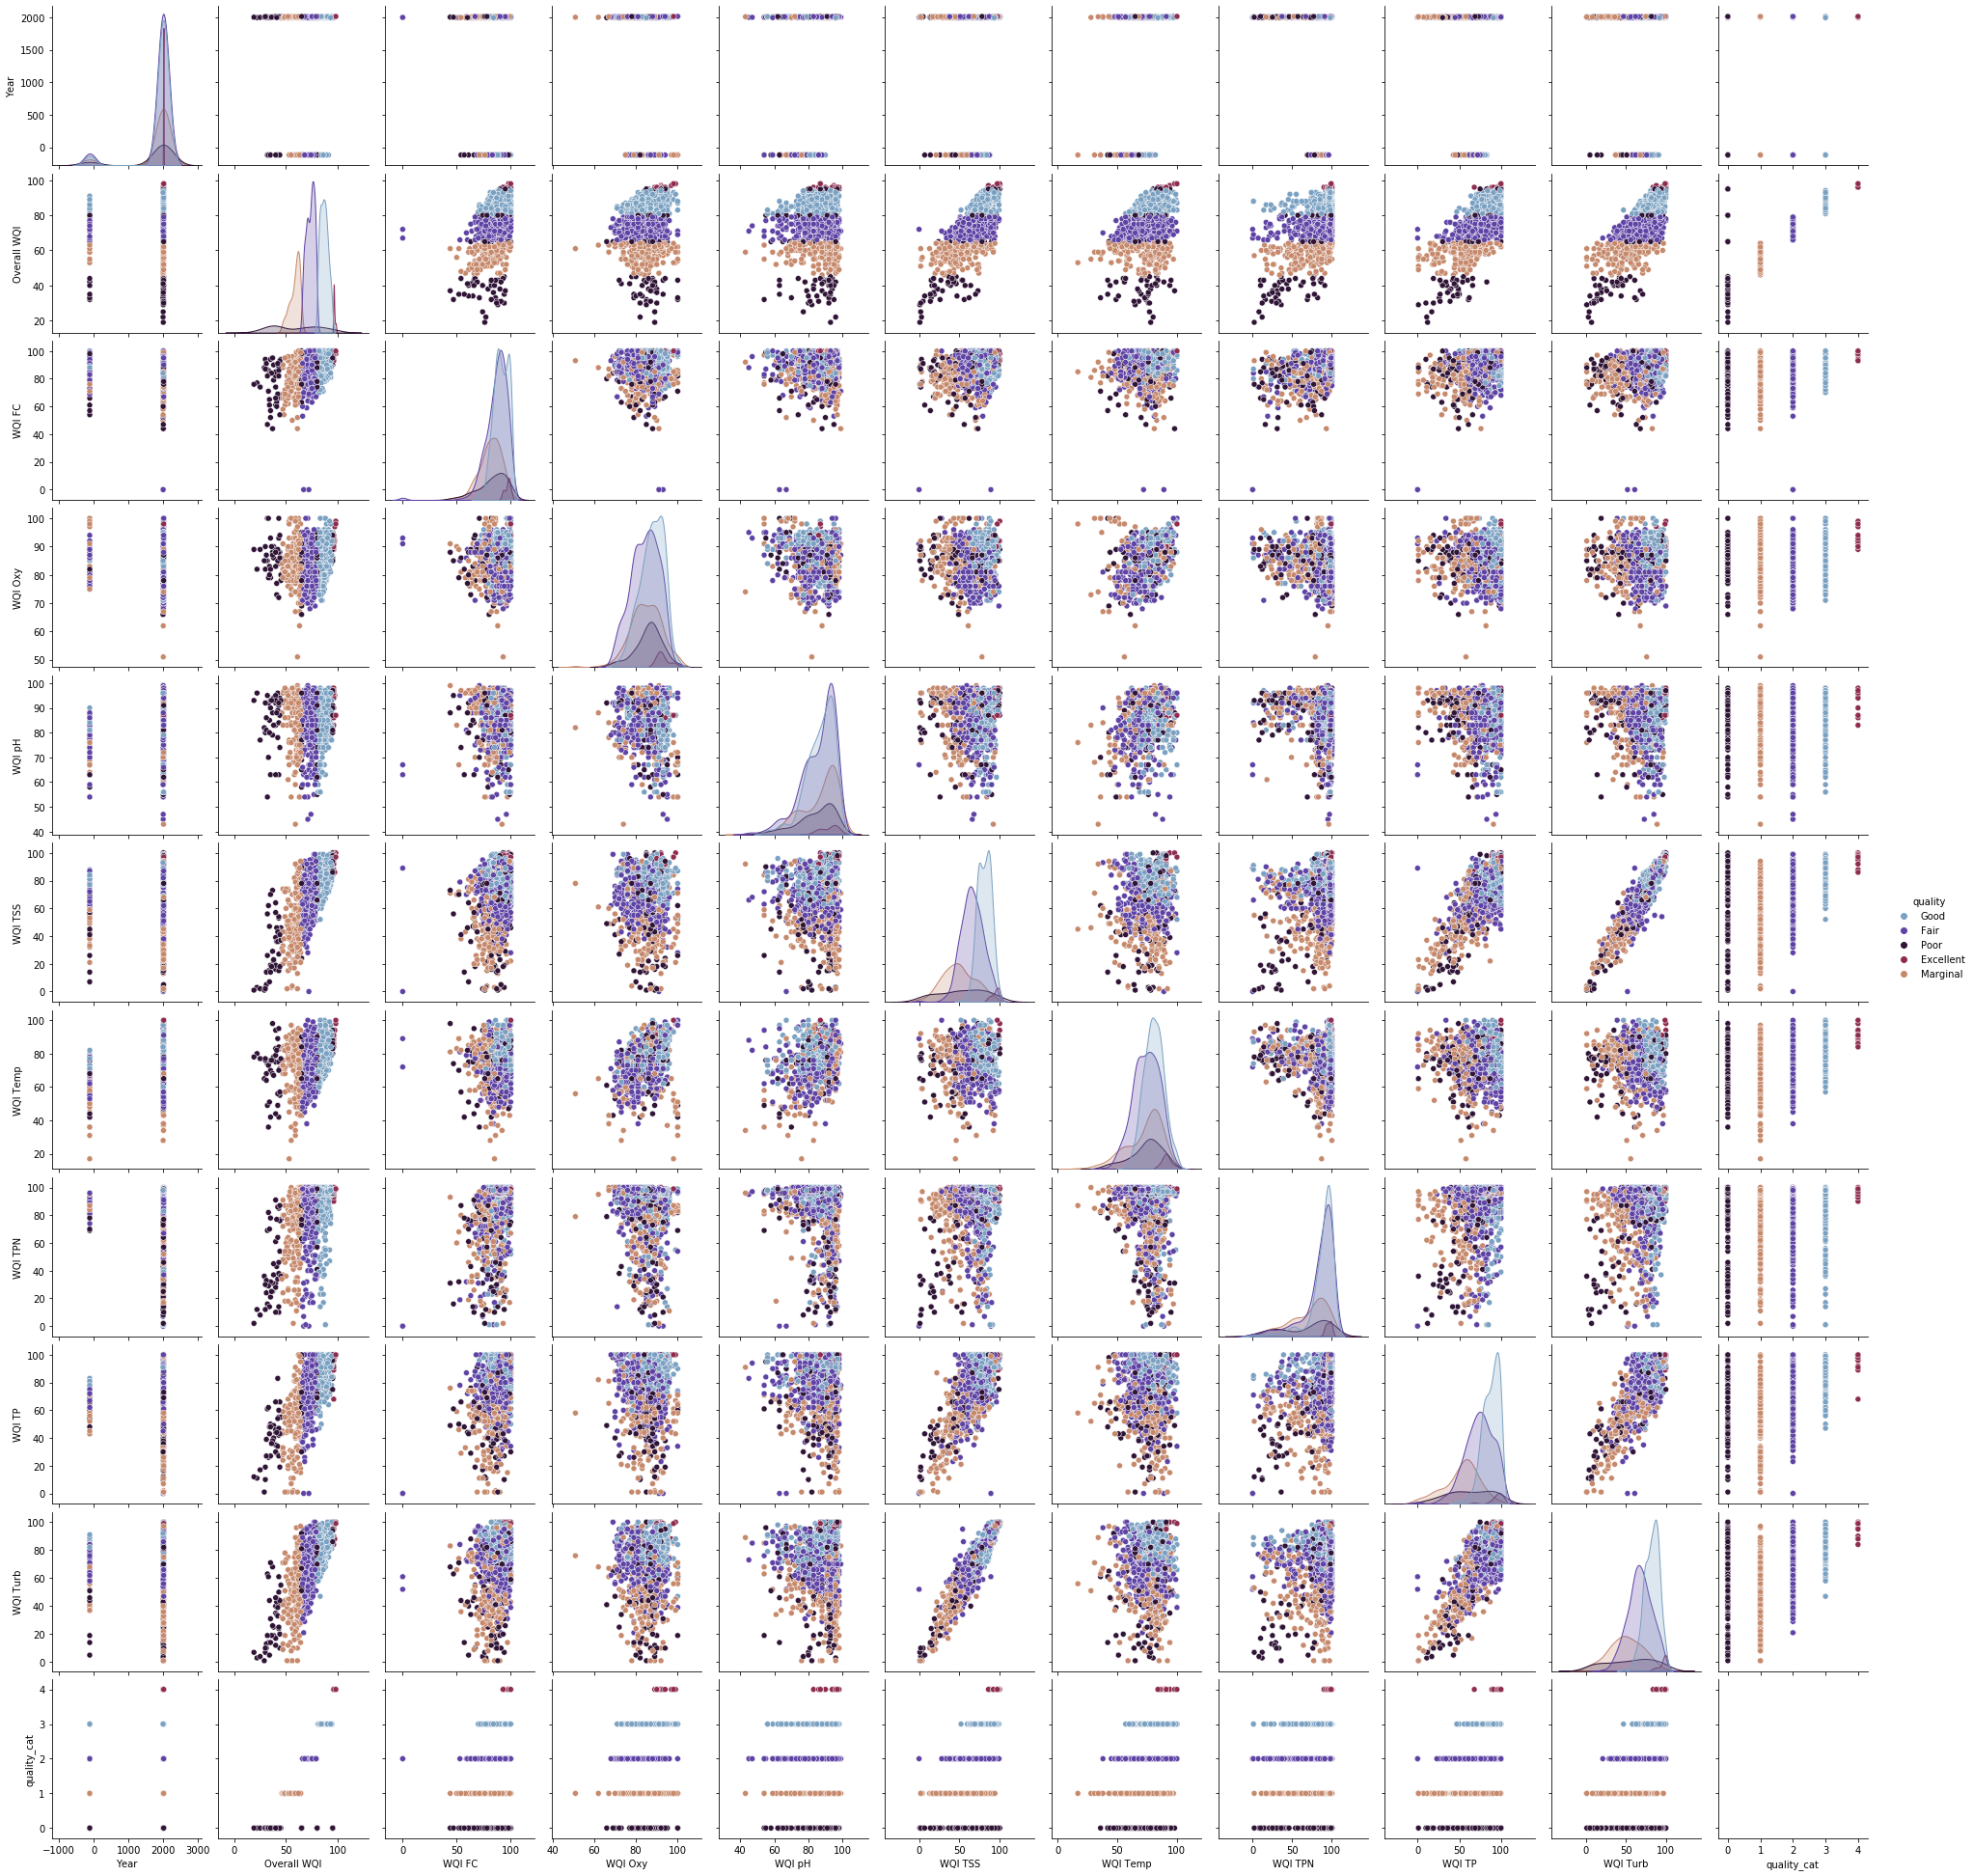

In [9]:
#Pairplot
import seaborn as sb
ax = sb.pairplot(data, hue="quality",diag_kind="kde",kind="scatter",palette="twilight")
plt.show()

In [10]:
x = data.drop(["Overall WQI", "quality", "quality_cat","Station Name", "Year", "Station", "Location 1" ], axis=1)
y = data["Overall WQI"]
#pandas.DataFrame.rename(columns={'old_column_name':'new_column_name'})
y = y.rename({'Overall WQI':'WQI'}, axis=1)
#x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)

# no se debe picklear un array como "scaled_array" sino el objeto FITEADO min_max_scaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

# LE HACEMOS EL fit con los Datos ¡¡¡
min_max_scaler.fit_transform(x.values.astype(float))   # ENTRE 0 y 1


# y lo serializamos para luego
with open('min_max_scaler.pkl', 'wb') as fid:
    pickle.dump(min_max_scaler, fid,2)
    
x.head(2)  

# Normalizamos entre 0 y 1


,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb
0,91,85,95,78,81,99,84,69
1,78,84,77,85,90,99,72,80


In [11]:
data.head(3)

,Station,Station Name,Year,Overall WQI,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP,WQI Turb,Location 1,quality,quality_cat
0,16A070,Skokomish R nr Potlatch,1996.0,87,91,85,95,78,81,99,84,69,POINT (-123.1771 47.3098),Good,3
1,16A070,Skokomish R nr Potlatch,1997.0,86,78,84,77,85,90,99,72,80,POINT (-123.1771 47.3098),Good,3
2,16A070,Skokomish R nr Potlatch,1998.0,75,90,79,88,61,90,98,71,49,POINT (-123.1771 47.3098),Fair,2


## Normalizamos entre 0 y 1 

In [12]:


# no se debe picklear un array como "scaled_array" sino el objeto FITEADO min_max_scaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

# LE HACEMOS EL fit con los INPUT ¡¡
min_max_scaler.fit_transform(x.values.astype(float))   # ENTRE 0 y 1

# y lo serializamos para luego, esto se usa para NORMALIZAR EL INPUT x 
with open('WQI-streamlit-app\min_max_scaler.pkl', 'wb') as fid:
    pickle.dump(min_max_scaler, fid,2)
    
    
min_max_scaler_cargado = pickle.load(open('WQI-streamlit-app\min_max_scaler.pkl', 'rb'))

#-----------funcion normalizar data frame-------------------
def normalizar(algun_df):
    algun_df_norm = pd.DataFrame(min_max_scaler_cargado.transform(algun_df.values.astype(float)))

    algun_df_norm.columns = algun_df.columns
    return algun_df_norm    
#------------------------------------------

# vamos a ver si funciona normalizar del pickle
x_normalized = normalizar(x)
x_normalized.head()

# SERIALIZAMOS df1_normalized
with open('WQI-streamlit-app\x_normalized_multi.pkl', 'wb') as fid:
    pickle.dump(x_normalized, fid,2)
         

# check
x_normalized.head()

# randomforest
x_norm_train , x_norm_test , y_train , y_test = train_test_split(x_normalized , y, test_size=0.25, random_state=42)

'''
pipelines = []
pipelines.append(('Scaled_logistic', Pipeline([('scaler', StandardScaler()),('linear', LogisticRegression())])))
pipelines.append(('Logistic', Pipeline([('linear', LogisticRegression())])))
pipelines.append(('Arbre', Pipeline([('arbre', RandomForestClassifier())])))
pipelines.append(('K-NN', Pipeline([('K-NN', KNeighborsClassifier())])))

for nombre, modelo in pipelines:
    a= cross_val_score(modelo, x_train, y_train, cv = 5, scoring = 'accuracy').mean()*100
    print("%s: %f " % (nombre, a))
'''
### Vemos que el modelo basado en Random Forest es el más preciso ¡
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees

# EL REGRESOR, NO CONFUNDIR CON EL CLASSIFIER ANTERIOR ¡¡¡
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_norm_train, y_train)

# asi hariamos una predicción sobre el primer registro de 
rf.predict([x_norm_test.iloc[0]])[0]
y_test.iloc[0]

# SERIALIZAMOS el modelo NORMALIZADO
with open('modelo_normalizado.pkl', 'wb') as fid:
    pickle.dump(rf, fid,2)

score = rf.fit(x_norm_train, y_train).score(x_norm_test, y_test)
print("score = ", score)

score =  0.9111161818416689


### asi se calcularian las predicciones con los valores NO Normalizados

In [13]:
x2_train , x2_test , y2_train , y2_test = train_test_split(x , y, test_size=0.25, random_state=42)
Result_pred = rf.predict(min_max_scaler.transform([x2_test.iloc[0]]))[0]
Result_pred

84.456

This is a multiple class problem and can be solved using logistic regression.
**Based on designations set by CCME(2005) to classify water based on WQI.**
```
Excellent     95-100     All measurements are within objectives virtually all of the time
```
```
Good          80-94      Conditions rarely depart from natural or desirable levels
```
```
Fair          65-79      Conditions sometimes depart from natural or desirable levels
```
```
Marginal      45-64      Conditions often depart from natural or desirable levels
```
```
Poor           0-44      Conditions usually depart from natural or desirable levels**
```

As we can see logistic regression does horribly on this problem,**mainly because the data set is highly unbalanced** 

## Precision and Recall

$$
[\text{precision}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all data points with positive predictions]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false positives}]}
$$

A complementary metric i.e **recall**, which measures the ratio between the number of true positives and that of ground-truth:

$$
[\text{recall}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all positive data points]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false negatives}]}
$$

